In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

4422102/4422102 [==============================] - 0s 0us/step


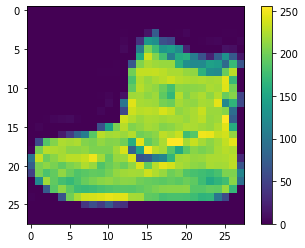

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Veri Setlerini daha rahat analiz yapabilmek için isimlendiriyoruz.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [3]:
#Sinir Ağına geçmeden önce 0 ve 1 e ölçekliyoruz. Bu da 255 e bölerek oluyor.
train_images = train_images / 255.0
test_images = test_images / 255.0

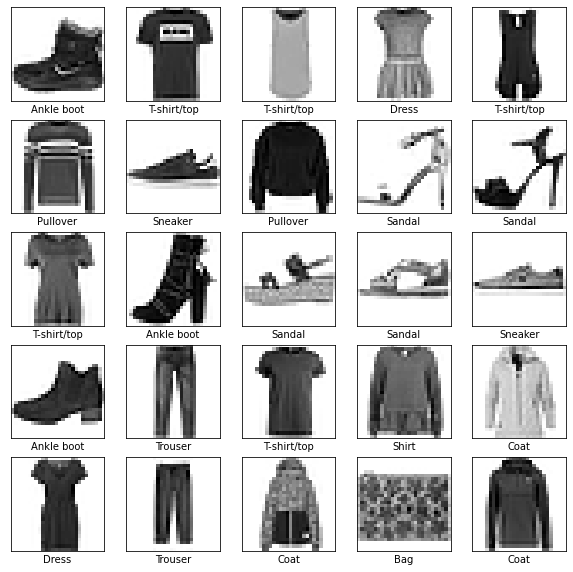

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

#Bir model katman oluşturuyoruz.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [5]:
#Modelin kaç kere Epoch yapacağını yazıyoruz.
model.fit(train_images, train_labels, epochs=10)
#Doğruluğunu değerlendiriyoruz.
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5047 - accuracy: 0.8227
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3785 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3378 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3148 - accuracy: 0.8836
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2963 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2834 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2702 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2594 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2500 - accuracy: 0.9064
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.23

In [6]:
#Tahminler Yapıyoruz.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

313/313 [==============================] - 1s 2ms/step


array([1.6661123e-07, 1.3197095e-08, 3.0644046e-08, 1.1366841e-09,
       1.6158352e-06, 3.0538249e-03, 4.5227928e-08, 4.8591280e-03,
       2.7156926e-07, 9.9208492e-01], dtype=float32)

In [7]:
#En yüksek güven değerine sahip olan etiket gösteriliyor.
np.argmax(predictions[0])

9

In [8]:
#Modelimiz en çok bu görüntünün doğru olduğuna ikna olmuştur.
test_labels[0]

9

In [9]:
#Tahminleri çizmek için fonksiyonlar oluşturuyoruz. 

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

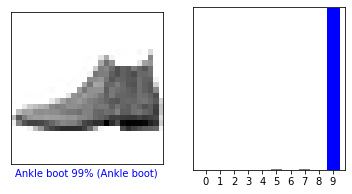

In [10]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

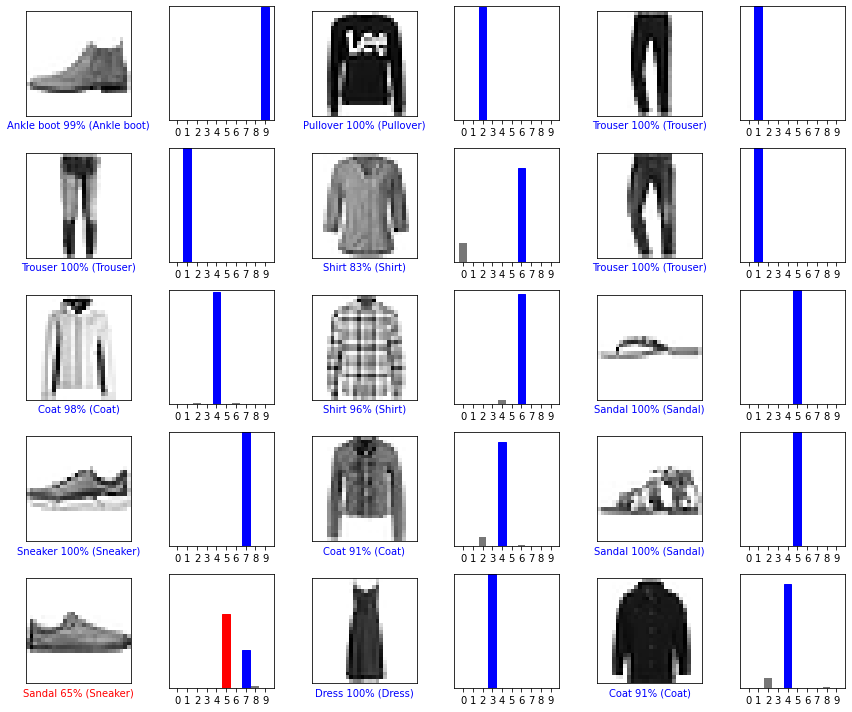

In [11]:
# Doğru tahminleri "Mavi", yanlış tahminleri "Kırmızı" ile boya.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [12]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
